In [1]:
library(stringr)
library(ggfortify)
library(dplyr)
library(ggrepel)
library(tidyr)
library(tibble)

Le chargement a nécessité le package : ggplot2


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

In [ ]:
df <- readr::read_tsv("/work/project/fragencode/workspace/plus4pigs/results/extension_annotation_sus_scrofa/tagada_06_23/quantification/reference_genes_TPM.tsv")

In [ ]:
ramiro <- readr::read_tsv("/work/project/fragencode/workspace/plus4pigs/data/ramiro_ESC/out/quantification/reference_genes_TPM.tsv")

In [6]:
chinese <- readr::read_tsv("/work/project/fragencode/workspace/plus4pigs/results/chinese_bulk_pESC/out/quantification/reference_genes_TPM.tsv")

Rows: 35670 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): gene
dbl (4): CRR271367, CRR271368, CRR271369, CRR271370

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
korean <- readr::read_tsv("/work/project/fragencode/workspace/plus4pigs/results/korean_tagada/quantification/reference_genes_TPM.tsv")

Rows: 35670 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): gene
dbl (9): SRR7851661, SRR7851662, SRR7851663, SRR7851664, SRR7851665, SRR7851...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
gao <- readr::read_tsv("/work/project/fragencode/workspace/plus4pigs/results/gao_tagada/quantification/reference_genes_TPM.tsv")

Rows: 35670 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): gene
dbl (2): ERR3153955, ERR3153956

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
ramiro <- as.data.frame(ramiro)

In [9]:
df <- as.data.frame(df)

In [10]:
chinese <- as.data.frame(chinese)

In [11]:
korean <- as.data.frame(korean)

In [12]:
gao <- as.data.frame(gao)

In [13]:
df_name<-readr::read_tsv("/work/project/fragencode/workspace/plus4pigs/results/extension_annotation_sus_scrofa/tagada_06_23/quantification/reference_genes_counts.tsv")

Rows: 35670 Columns: 31
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): gene
dbl (30): 1Embryon-J9-dil5-1, 1Embryon-J9-dil5-2, 1Embryon-J9-dil5-3, 1Embry...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
df_name$gene <- sub('.*\\|', '', df_name$gene)

In [15]:
df$gene <- df_name$gene
ramiro$gene <- df_name$gene
chinese$gene <- df_name$gene
korean$gene <- df_name$gene
gao$gene <- df_name$gene

In [16]:
matrix_bulk <- df[,c("gene", "pESC_LWJ7.1", "pESC_LWJ9.1", "pESC_LWJ9.5", "pESC_LWJ9.8", "pTS_LWJ11.3")]

In [17]:
matrix_bulk <- matrix_bulk %>% group_by(gene) %>% summarise_each(funs(sum)) %>% as.data.frame()

Warning message:
“`summarise_each_()` was deprecated in dplyr 0.7.0.
ℹ Please use `across()` instead.
ℹ The deprecated feature was likely used in the dplyr package.
  Please report the issue at <https://github.com/tidyverse/dplyr/issues>.”
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [18]:
rownames(matrix_bulk) <- matrix_bulk$gene

In [19]:
ramiro <- ramiro %>% group_by(gene) %>% summarise_each(funs(sum)) %>% as.data.frame()

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [20]:
chinese <- chinese %>% group_by(gene) %>% summarise_each(funs(sum)) %>% as.data.frame()

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [21]:
korean <- korean %>% group_by(gene) %>% summarise_each(funs(sum)) %>% as.data.frame()

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [22]:
gao <- gao %>% group_by(gene) %>% summarise_each(funs(sum)) %>% as.data.frame()

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [23]:
total1 <- merge(ramiro, matrix_bulk, by="gene")
total2 <- merge(total1, chinese, by="gene")
total3 <- merge(total2, korean, by="gene")
total <- merge(total3, gao, by="gene")

In [24]:
rownames(total) <- total$gene

In [25]:
total <- total[,-1]

In [26]:
total <- t(total)

In [28]:
total <- rbind(total, colMeans(total[c("SRR14285961", "SRR14285962", "SRR14285963", "SRR14285964", "SRR14285965"),]))
total <- rbind(total, colMeans(total[c("SRR14285966", "SRR14285967", "SRR14285968", "SRR14285969", "SRR14285970"),]))
total <- rbind(total, colMeans(total[c("SRR14285971", "SRR14285972", "SRR14285973", "SRR14285974", "SRR14285975"),]))
total <- rbind(total, colMeans(total[c("SRR14285976", "SRR14285977", "SRR14285978", "SRR14285979", "SRR14285980"),]))
total <- rbind(total, colMeans(total[c("SRR14285981", "SRR14285982", "SRR14285983", "SRR14285984", "SRR14285985"),]))
total <- rbind(total, colMeans(total[c("SRR14285986", "SRR14285987", "SRR14285988", "SRR14285989", "SRR14285990"),]))
total <- rbind(total, colMeans(total[c("SRR14285991", "SRR14285992", "SRR14285993", "SRR14285994", "SRR14285995"),]))
total <- rbind(total, colMeans(total[c("SRR14285996", "SRR14285997", "SRR14285998", "SRR14285999", "SRR14286000"),]))
total <- rbind(total, colMeans(total[c("SRR14286001", "SRR14286002", "SRR14286003", "SRR14286004", "SRR14286005"),]))

In [29]:
rownames(total) <- c('SRR14285961', 'SRR14285962', 'SRR14285963', 'SRR14285964', 'SRR14285965', 'SRR14285966', 'SRR14285967', 'SRR14285968', 'SRR14285969', 'SRR14285970', 'SRR14285971', 'SRR14285972', 'SRR14285973', 'SRR14285974', 'SRR14285975', 'SRR14285976', 'SRR14285977', 'SRR14285978', 'SRR14285979', 'SRR14285980', 'SRR14285981', 'SRR14285982', 'SRR14285983', 'SRR14285984', 'SRR14285985', 'SRR14285986', 'SRR14285987', 'SRR14285988', 'SRR14285989', 'SRR14285990', 'SRR14285991', 'SRR14285992', 'SRR14285993', 'SRR14285994', 'SRR14285995', 'SRR14285996', 'SRR14285997', 'SRR14285998', 'SRR14285999', 'SRR14286000', 'SRR14286001', 'SRR14286002', 'SRR14286003', 'SRR14286004', 'SRR14286005', 'pESC_LWJ7.1', 'pESC_LWJ9.1', 'pESC_LWJ9.5', 'pESC_LWJ9.8', 'pTS_LWJ11.3', 'CRR271367', 'CRR271368', 'CRR271369', 'CRR271370', 'SRR7851661', 'SRR7851662', 'SRR7851663', 'SRR7851664', 'SRR7851665', 'SRR7851666', 'SRR7851667', 'SRR7851668', 'SRR7851669', 'ERR3153955', 'ERR3153956', 'pig1_p6', 'pig1_p8', 'pig1_p10', 'pig2_p6', 'pig2_p8', 'pig2_p10', 'pig3_p6', 'pig3_p8', 'pig3_p10')

In [30]:
total <- total[c('pESC_LWJ7.1', 'pESC_LWJ9.1', 'pESC_LWJ9.5', 'pESC_LWJ9.8', 'pTS_LWJ11.3', 'CRR271367', 'CRR271368', 'CRR271369', 'CRR271370', 'SRR7851661', 'SRR7851662', 'SRR7851663', 'SRR7851664', 'SRR7851665', 'SRR7851666', 'SRR7851667', 'SRR7851668', 'SRR7851669', 'pig1_p6', 'pig1_p8', 'pig1_p10', 'pig2_p6', 'pig2_p8', 'pig2_p10', 'pig3_p6', 'pig3_p8', 'pig3_p10', 'ERR3153955', 'ERR3153956'),]

In [31]:
total <- total[,colSums(total) >= 50]

In [31]:
library(dplyr)
library(tidyr)
dtf <- total %>% 
    t() %>% 
    as.data.frame() %>% 
    # Explicitely add an identification column (for the grouping)
    mutate(id = rownames(.)) %>% 
    # put data in tidy format, one observation per row
    gather(key, value, c("pESC_LWJ7.1", "pESC_LWJ9.1", "pESC_LWJ9.5", "pESC_LWJ9.8", "pTS_LWJ11.3")) %>% 
    arrange(id) %>% 
    group_by(id) %>%
    mutate(variation = max(value, na.rm = TRUE) / (min(value, na.rm = TRUE)+1),
           median = median(value),
           distancefrommedian = abs(value-median),
           maxdistancefrommedian = max(distancefrommedian)) %>%
    select(c(id, variation)) %>%
    distinct() %>%
    ungroup() %>%
    top_n(variation, n = 2000)

head(dtf)

id,variation
<chr>,<dbl>
A2M,324.325135
AASS,18.464447
ABCC5,9.073853
ABCG4,5.657000
ABHD12B,9.371263
ABHD17B,12.168931


In [33]:
pca_res <- prcomp(total[,dtf$id], scale. = TRUE)
p0<-autoplot(pca_res,
             data = total,
             label = TRUE,
             label.size = 8,
             label.repel = TRUE,
             loadings = TRUE,
             loadings.label = TRUE,
             loadings.label.size = 8,
             loadings.label.repel = TRUE
            )

genes <- c(p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC1),][1:5,]$rownames, p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC2),][1:5,]$rownames, p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC1,decreasing = TRUE),][1:5,]$rownames, p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC2,decreasing = TRUE),][1:5,]$rownames)

# edit ggplot object geom_segment layer:
p0$layers[[3]]$data <- p0$layers[[3]]$data[genes,]
p0$layers[[3]]$data <- p0$layers[[3]]$data[,1:11-1]/2

# edit ggplot object geom_text layer:
p0$layers[[4]]$data <- p0$layers[[4]]$data[genes,]
row <- p0$layers[[4]]$data$rownames
p0$layers[[4]]$data <- p0$layers[[4]]$data[,1:11-1]/2
p0$layers[[4]]$data$rownames <- row

plot <- p0 + theme_bw() +
  theme(axis.text = element_text(size=12), axis.title = element_text(size=12), legend.text = element_text(size = 20), legend.title = element_text(size = 20)) +
  guides(colour = guide_legend(override.aes = list(size = 6))) +
  scale_color_manual(values=c('#FFC312','#C4E538','#12CBC4'), name = "Stade Cluster", labels = c("Intermediate", "Late", "Early")) # default plot

Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


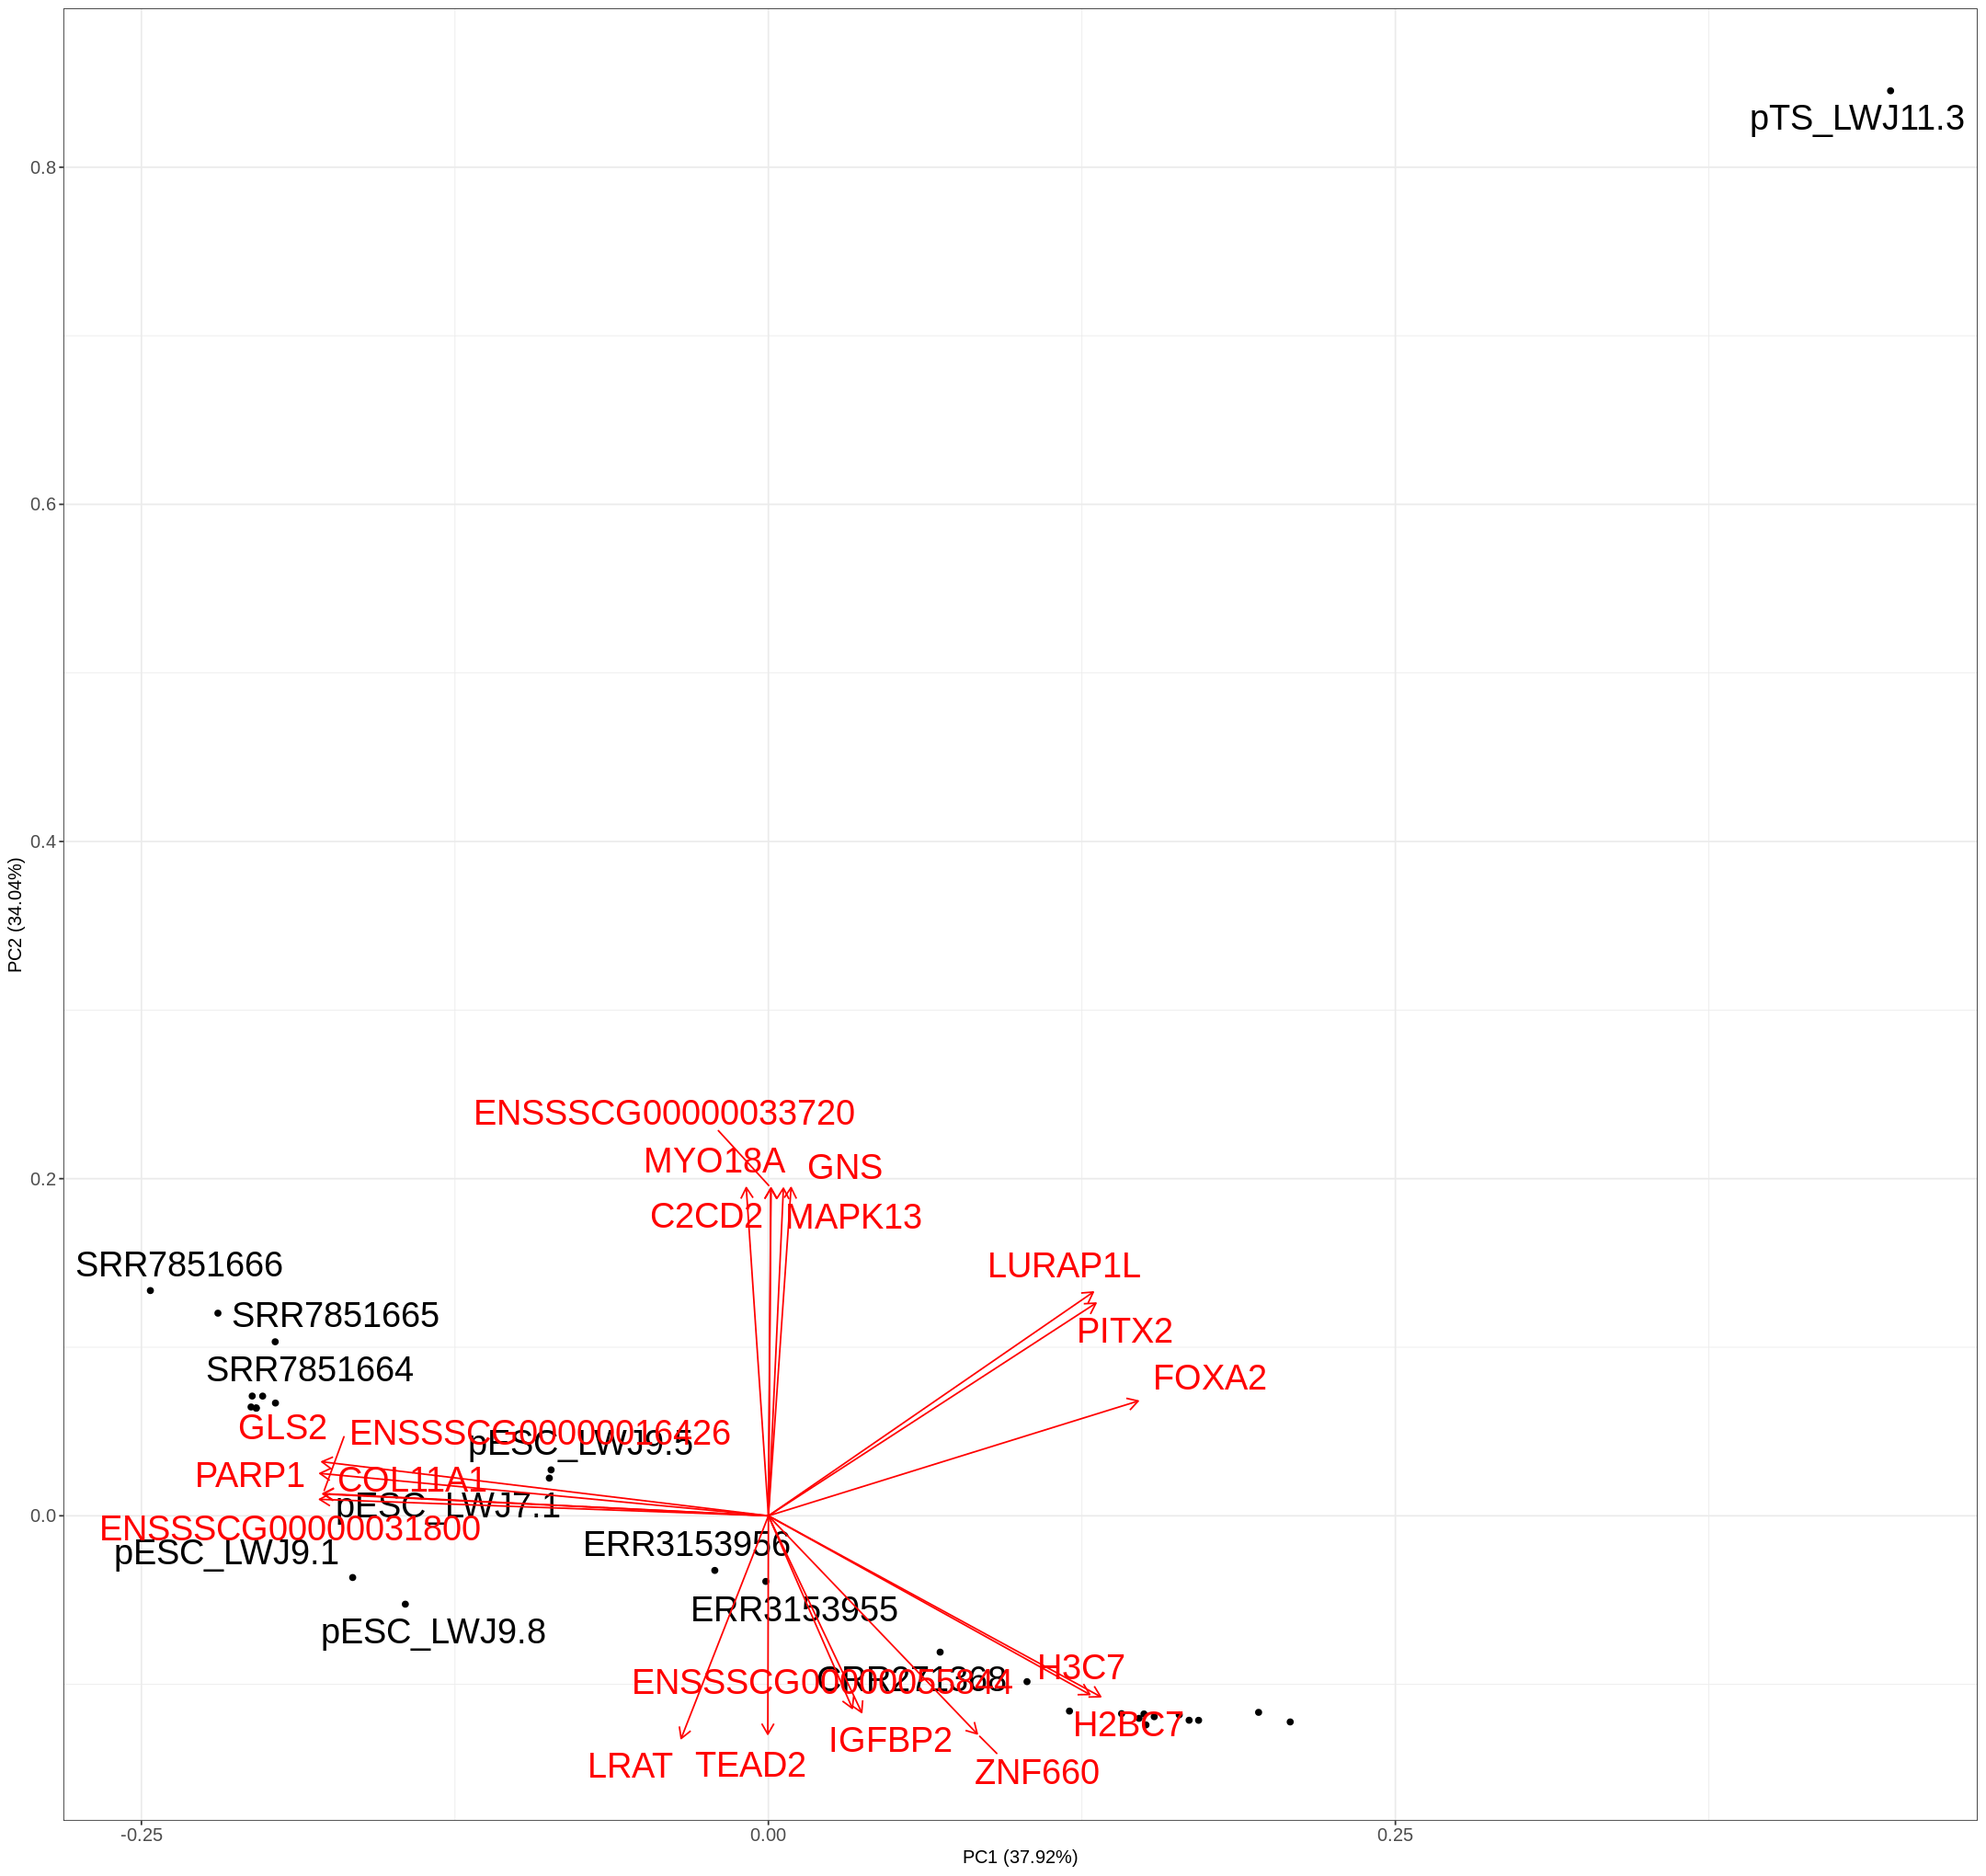

In [34]:
plot

In [37]:
ggsave(
  '/home/adufour/work/notebook/plots/bulk_esc/PCA_esc.svg',
  plot,
  height = 18,
  width = 20
)

Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [38]:
pca_res <- prcomp(total, scale. = TRUE)
p0<-autoplot(pca_res,
             data = total,
             label = TRUE,
             label.size = 8,
             label.repel = TRUE,
             label.hjust = 5,
             loadings = FALSE,
             loadings.label = FALSE,
             loadings.label.size = 8,
             max.overlaps = 1000,
             loadings.label.repel = FALSE
            )

plot <- p0 + theme_bw() +
  theme(axis.text = element_text(size=12), axis.title = element_text(size=12), legend.text = element_text(size = 20), legend.title = element_text(size = 20)) +
  guides(colour = guide_legend(override.aes = list(size = 6))) +
  expand_limits(x = c(-0.5,0.5), y = c(-0.5,0.5)) +
  scale_color_manual(values=c('#FFC312','#C4E538','#12CBC4'), name = "Stade Cluster", labels = c("Intermediate", "Late", "Early")) # default plot

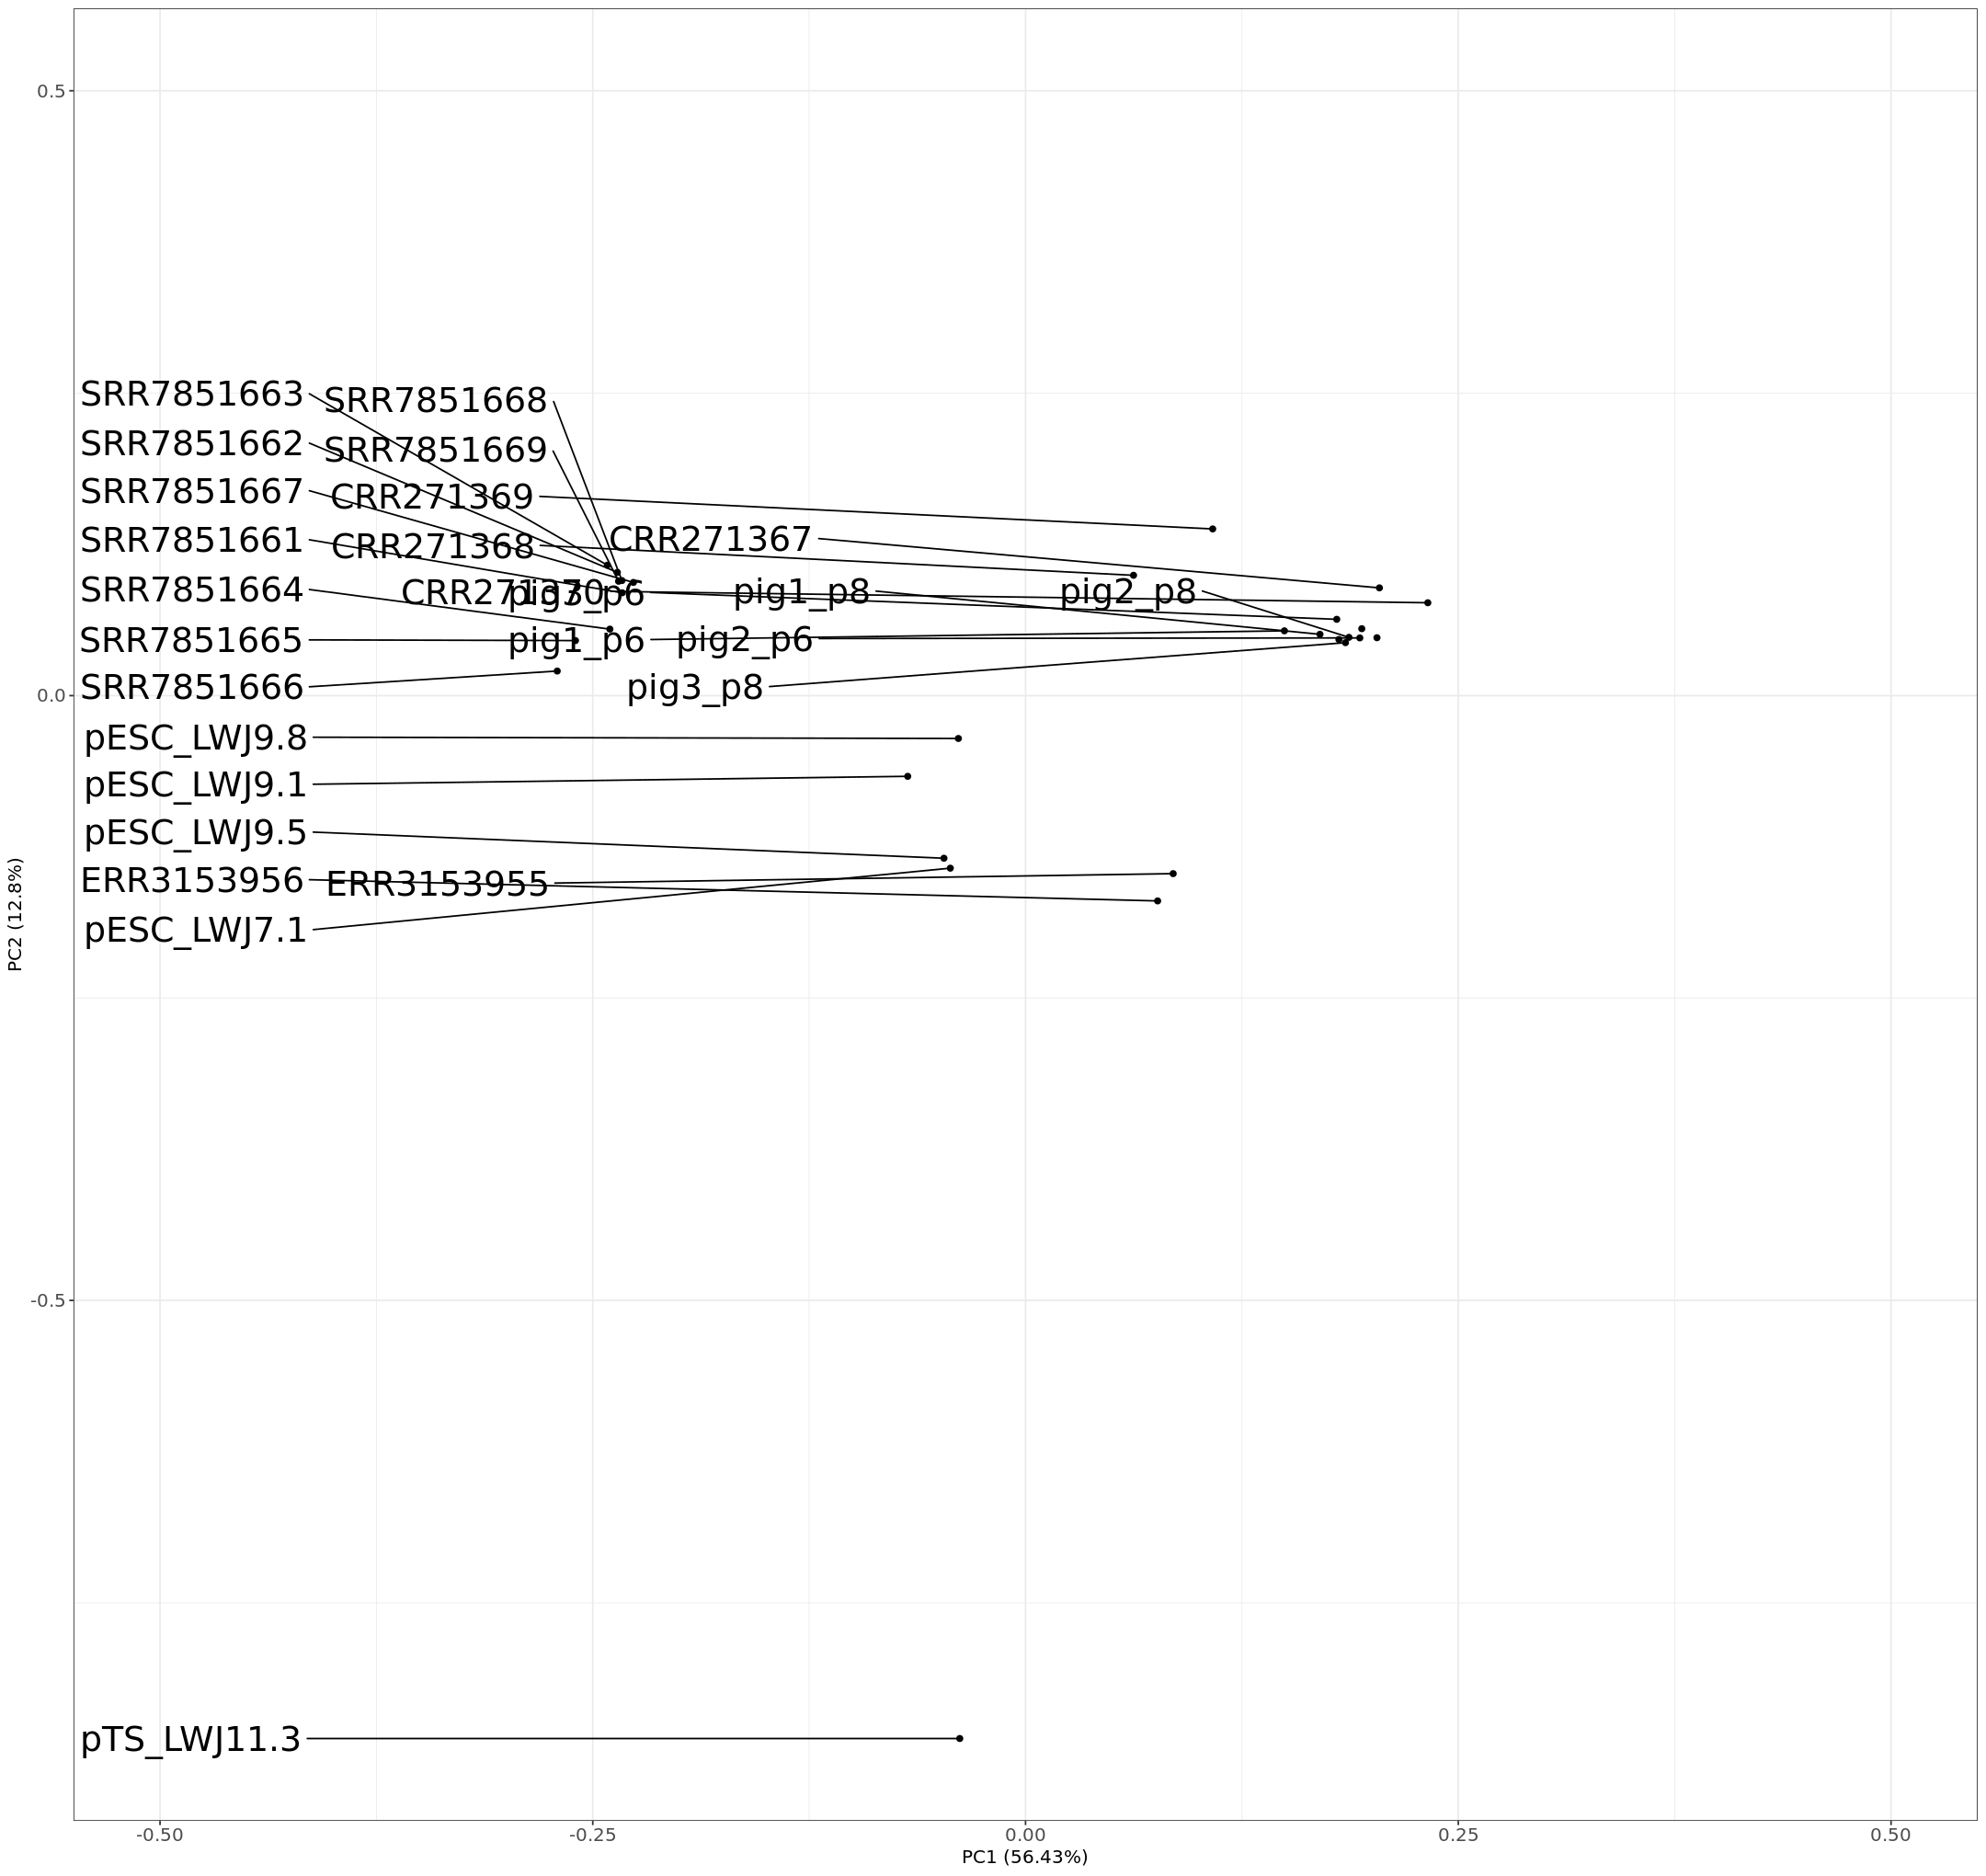

In [39]:
plot

In [38]:
sample_table <- as.data.frame(t(total))

In [39]:
ramiro_list <- unname(rowMeans(sample_table[,c('pig1_p6', 'pig1_p8', 'pig1_p10', 'pig2_p6', 'pig2_p8', 'pig2_p10', 'pig3_p6', 'pig3_p8', 'pig3_p10')]))
chinese <- unname(rowMeans(sample_table[,c('CRR271367', 'CRR271368', 'CRR271369', 'CRR271370')]))
acloque <- unname(rowMeans(sample_table[,c('pESC_LWJ7.1', 'pESC_LWJ9.1', 'pESC_LWJ9.5', 'pESC_LWJ9.8')]))
korean <- unname(rowMeans(sample_table[,c('SRR7851661', 'SRR7851662', 'SRR7851663', 'SRR7851664', 'SRR7851665', 'SRR7851666', 'SRR7851667', 'SRR7851668', 'SRR7851669')]))
gao <- unname(rowMeans(sample_table[,c('ERR3153955', 'ERR3153956')]))

In [40]:
sample_table$ramiro <- ramiro_list
sample_table$chinese <- chinese
sample_table$acloque <- acloque
sample_table$korean <- korean
sample_table$gao <- gao

In [41]:
sample_table <- sample_table[,c('ramiro', 'chinese', 'gao', 'korean', 'pESC_LWJ7.1', 'pESC_LWJ9.1', 'pESC_LWJ9.5', 'pESC_LWJ9.8', 'pTS_LWJ11.3')]

In [42]:
correlation_table <- data.frame(matrix(nrow = length(colnames(sample_table)), ncol = length(colnames(sample_table))))
colnames(correlation_table) <- colnames(sample_table)
rownames(correlation_table) <- colnames(sample_table)

for (i in colnames(sample_table)) {
  for (a in colnames(sample_table)) {
  print(paste("comparing", i, a))
  correlation_table[i,a] <- cor(sample_table[i], sample_table[a], method='spearman')
  }
}

[1] "comparing ramiro ramiro"
[1] "comparing ramiro chinese"
[1] "comparing ramiro gao"
[1] "comparing ramiro korean"
[1] "comparing ramiro pESC_LWJ7.1"
[1] "comparing ramiro pESC_LWJ9.1"
[1] "comparing ramiro pESC_LWJ9.5"
[1] "comparing ramiro pESC_LWJ9.8"
[1] "comparing ramiro pTS_LWJ11.3"
[1] "comparing chinese ramiro"
[1] "comparing chinese chinese"
[1] "comparing chinese gao"
[1] "comparing chinese korean"
[1] "comparing chinese pESC_LWJ7.1"
[1] "comparing chinese pESC_LWJ9.1"
[1] "comparing chinese pESC_LWJ9.5"
[1] "comparing chinese pESC_LWJ9.8"
[1] "comparing chinese pTS_LWJ11.3"
[1] "comparing gao ramiro"
[1] "comparing gao chinese"
[1] "comparing gao gao"
[1] "comparing gao korean"
[1] "comparing gao pESC_LWJ7.1"
[1] "comparing gao pESC_LWJ9.1"
[1] "comparing gao pESC_LWJ9.5"
[1] "comparing gao pESC_LWJ9.8"
[1] "comparing gao pTS_LWJ11.3"
[1] "comparing korean ramiro"
[1] "comparing korean chinese"
[1] "comparing korean gao"
[1] "comparing korean korean"
[1] "comparing korean

In [45]:
correlation_plot <- correlation_table %>%
  rownames_to_column(var = 'cluster_1') %>%
  pivot_longer(
    cols = 2:ncol(.),
    names_to = 'cluster_2',
    values_to = 'Correlation'
  ) %>%
  mutate(
    cluster_1 = as.character(cluster_1),
    cluster_1 = factor(cluster_1, levels = rev(unique(cluster_1))),
    cluster_2 = factor(cluster_2, levels = unique(cluster_2))
  ) %>%
  ggplot(aes(cluster_2, cluster_1, fill = Correlation)) +
  geom_tile(color = 'white') +
  geom_text(aes(label = round(Correlation, digits = 2)), size = 16) +
  scale_x_discrete(name = 'Cluster', position = 'top') +
  scale_y_discrete(name = 'Cluster') +
  scale_fill_gradient(
    name = 'Correlation', low = 'white', high = '#c0392b', na.value = '#bdc3c7',
    limits = c(0.25,1),
    guide = guide_colorbar(
      frame.colour = 'black', ticks.colour = 'black', title.position = 'left',
      title.theme = element_text(size = 24, hjust = 1, angle = 90),
      label.theme = element_text(size = 18), barwidth = 0.75, barheight = 10
    )
  ) +
  coord_fixed() +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = 24, angle = 90, hjust = 0),
    axis.text.y = element_text(size = 24),
    legend.position = 'right',
    panel.grid.major = element_blank()
  )

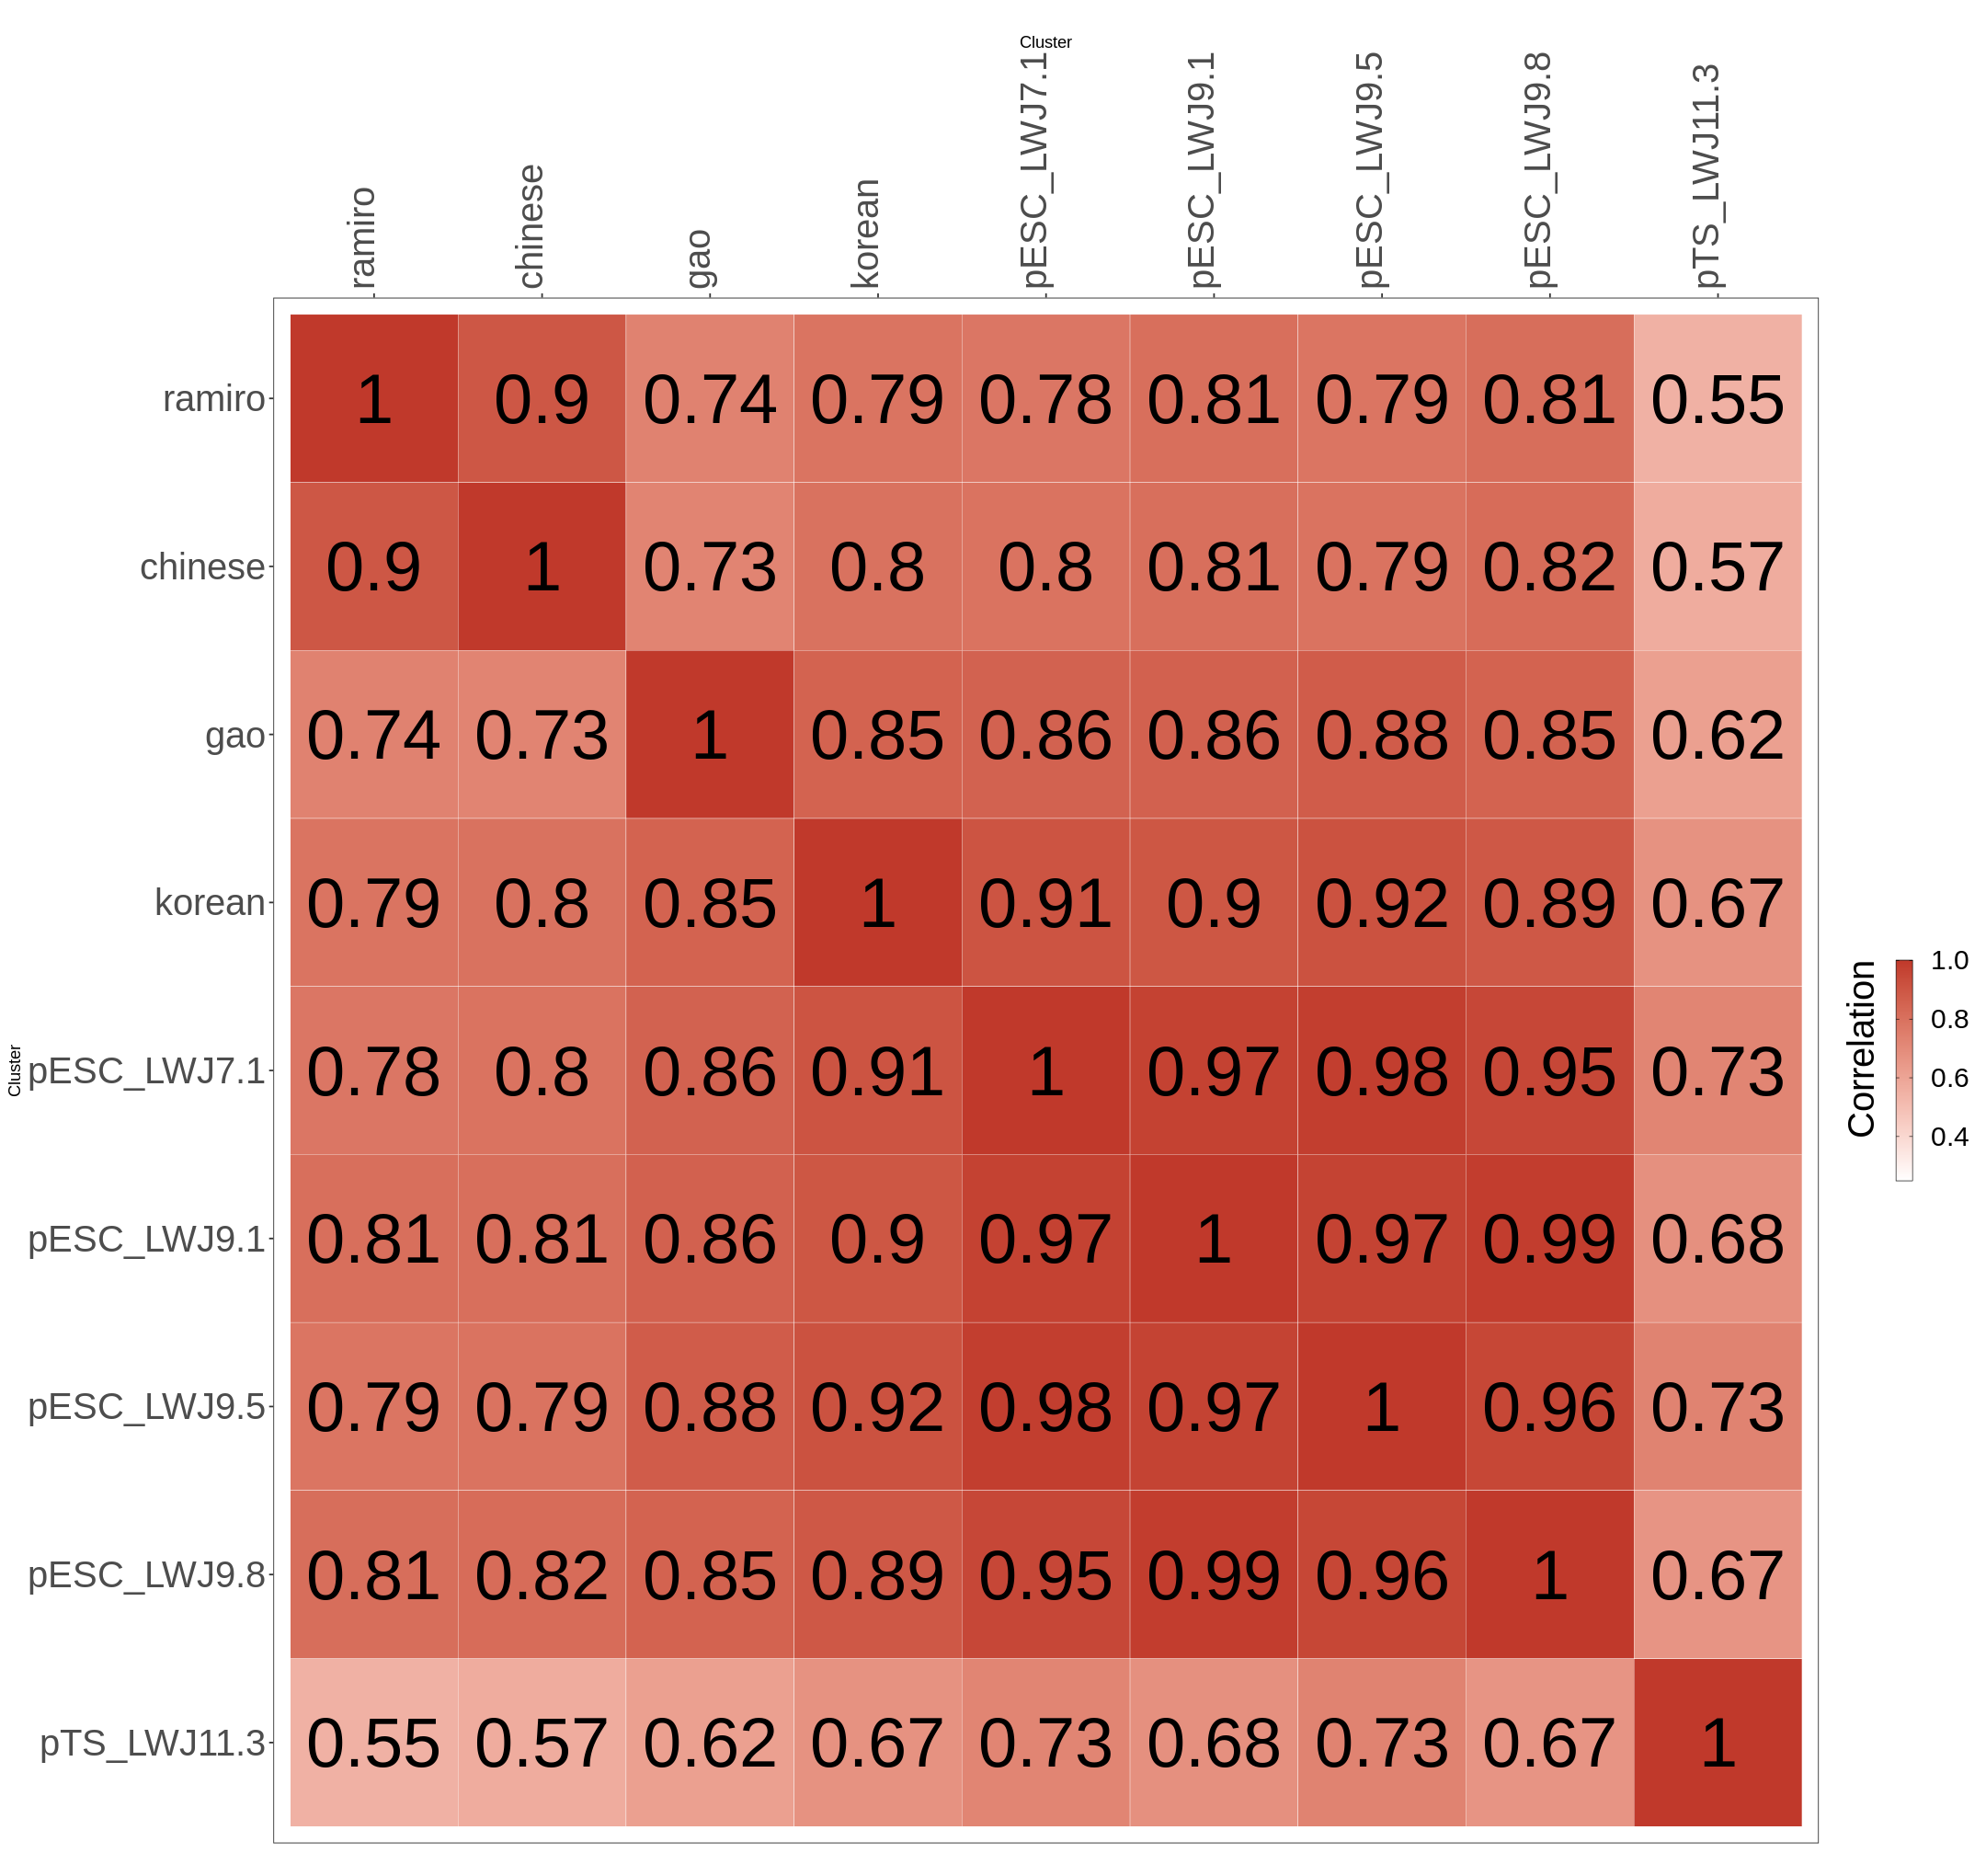

In [46]:
correlation_plot

In [48]:
ggsave(
  '/home/adufour/work/notebook/plots/bulk_esc/correlation_esc.png',
  correlation_plot,
  height = 18,
  width = 20
)

In [49]:
saveRDS(total, "/home/adufour/work/rds_storage/bulk/bulk_total.rds")